In [2]:
# import necessary libraries
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import re


In [3]:
one = pd.read_csv('11번가.csv')

### 데이터 전처리

In [4]:
#필요 데이터만 뽑은 데이터베이스

df = one[['요일','주문/배송상태','주문일_출고예정','상품명','취소수량','반품수량','상품수량','매출액','주문수량']]

In [5]:
# null 값 확인

df.isna().sum()

요일          0
주문/배송상태     0
주문일_출고예정    0
상품명         0
취소수량        0
반품수량        0
상품수량        0
매출액         0
주문수량        0
dtype: int64

In [6]:
df

,요일,주문/배송상태,주문일_출고예정,상품명,취소수량,반품수량,상품수량,매출액,주문수량
0,Saturday,배송 완료,4 days,비비고/총각김치2.3KG,0,0,1,26900,1
1,Saturday,배송 완료,4 days,비비고 포기배추김치 더풍부한맛 3.3kg,0,0,1,33800,1
2,Saturday,배송 완료,4 days,비비고/열무를 넣은 총각김치 1.3Kg,0,0,1,14900,1
3,Saturday,배송 완료,4 days,[공용_마켓전략]비비고 묵은지 1.5kg,0,0,1,16900,1
4,Saturday,배송 완료,2 days,삼호 얇은포 부산어묵 1kg,0,0,4,35120,4
...,...,...,...,...,...,...,...,...,...
1543,Sunday,배송 완료,2 days,[복합_마켓전략]비비고 노릇하게구운고등어구이60gx5 + 순살삼치구이60gx5(냉동),0,0,1,19450,5
1544,Sunday,배송 완료,2 days,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),0,0,1,4960,2
1545,Sunday,배송 완료,2 days,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),0,0,1,4960,2
1546,Sunday,배송 완료,2 days,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),0,0,1,4960,2


In [7]:
df_4 = one[['요일','상품명','상품수량','주문수량','취소수량','반품수량','매출액','상품유형',]]

In [8]:
df_4

,요일,상품명,상품수량,주문수량,취소수량,반품수량,매출액,상품유형
0,Saturday,비비고/총각김치2.3KG,1,1,0,0,26900,단일 상품
1,Saturday,비비고 포기배추김치 더풍부한맛 3.3kg,1,1,0,0,33800,단일 상품
2,Saturday,비비고/열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,단일 상품
3,Saturday,[공용_마켓전략]비비고 묵은지 1.5kg,1,1,0,0,16900,단일 상품
4,Saturday,삼호 얇은포 부산어묵 1kg,4,4,0,0,35120,단일 상품
...,...,...,...,...,...,...,...,...
1543,Sunday,[복합_마켓전략]비비고 노릇하게구운고등어구이60gx5 + 순살삼치구이60gx5(냉동),1,5,0,0,19450,복합 상품
1544,Sunday,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),1,2,0,0,4960,복합 상품
1545,Sunday,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),1,2,0,0,4960,복합 상품
1546,Sunday,[복합_마켓전략][새로워진 비비고죽] 마음도 가벼운 A SET(죽 10개),1,2,0,0,4960,복합 상품


In [9]:
# [] 삭제

df_4 = df_4[~df_4['상품명'].str.contains('\[[^)]+\]', na=False, case=False)]

In [10]:
# 상품명과 크기만 남겨두기 (/ 삭제)

df_4['상품명']=df_4['상품명'].str.replace(pat=r'[/_()]+', repl= r' ', regex=True)

C:\Users\kgw08\AppData\Local\Temp\ipykernel_18784\1819639756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['상품명']=df_4['상품명'].str.replace(pat=r'[/_()]+', repl= r' ', regex=True)


In [11]:
df_4

,요일,상품명,상품수량,주문수량,취소수량,반품수량,매출액,상품유형
0,Saturday,비비고 총각김치2.3KG,1,1,0,0,26900,단일 상품
1,Saturday,비비고 포기배추김치 더풍부한맛 3.3kg,1,1,0,0,33800,단일 상품
2,Saturday,비비고 열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,단일 상품
4,Saturday,삼호 얇은포 부산어묵 1kg,4,4,0,0,35120,단일 상품
5,Saturday,비비고 순살삼치구이 60gX2,1,2,0,0,10399,묶음 상품
...,...,...,...,...,...,...,...,...
1516,Monday,오천년의 신비 명품천일염 굵은입자 10kg,1,1,0,0,34430,단일 상품
1528,Sunday,고메 오리지널 핫도그 400g,1,1,0,0,9980,단일 상품
1533,Sunday,비비고 포기배추김치4.9kg,1,1,0,0,42900,단일 상품
1534,Sunday,비비고 열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,단일 상품


In [12]:
df_4['실판매수량'] = df_4['상품수량'] - df_4['취소수량'] - df_4['반품수량']

C:\Users\kgw08\AppData\Local\Temp\ipykernel_18784\1126010269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['실판매수량'] = df_4['상품수량'] - df_4['취소수량'] - df_4['반품수량']


In [13]:
df_4 = pd.get_dummies(df_4, columns = ['상품유형'])

In [14]:
df_4

,요일,상품명,상품수량,주문수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품
0,Saturday,비비고 총각김치2.3KG,1,1,0,0,26900,1,1,0,0
1,Saturday,비비고 포기배추김치 더풍부한맛 3.3kg,1,1,0,0,33800,1,1,0,0
2,Saturday,비비고 열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,1,1,0,0
4,Saturday,삼호 얇은포 부산어묵 1kg,4,4,0,0,35120,4,1,0,0
5,Saturday,비비고 순살삼치구이 60gX2,1,2,0,0,10399,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1516,Monday,오천년의 신비 명품천일염 굵은입자 10kg,1,1,0,0,34430,1,1,0,0
1528,Sunday,고메 오리지널 핫도그 400g,1,1,0,0,9980,1,1,0,0
1533,Sunday,비비고 포기배추김치4.9kg,1,1,0,0,42900,1,1,0,0
1534,Sunday,비비고 열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,1,1,0,0


### 1. 요일별 매출액 추이

- 가장 높음 : 월 -> 판매수량에 비해 매출액이 높음
- 가장 낮음 : 금,토,일

In [15]:
# 매출액이 가장 높은 요일 순 정렬

df_4_1 = df_4.groupby('요일').sum().sort_values('매출액', ascending = False)

# 월요일이 가장 높다
# 토,일이 가장 낮다 -> 11번가는 토,일을 중점으로 프로모션 강화

In [16]:
# 요일별 반품율

df_4_1['반품율'] = (df_4_1['취소수량'] + df_4_1['반품수량'])/df_4_1['상품수량']*100

# 일, 금, 토 순으로 높다. -> 고객들이 마음을 돌리지 못 할, 고객을 가둘 매력적인 프로모션 필요

In [17]:
df_4_1

,상품수량,주문수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,반품율
요일,,,,,,,,,,
Monday,172,246,4,0,1652156,168,52,35,6,2.325581
Thursday,217,380,3,0,1630748,214,37,80,0,1.382488
Tuesday,232,273,14,1,1448169,217,50,23,4,6.465517
Wednesday,122,178,0,0,1388983,122,33,31,2,0.000000
Friday,75,106,2,0,1124823,73,20,15,0,2.666667
Saturday,62,85,0,0,688380,62,17,16,0,0.000000
Sunday,93,116,0,0,650872,93,21,11,0,0.000000


<BarContainer object of 7 artists>

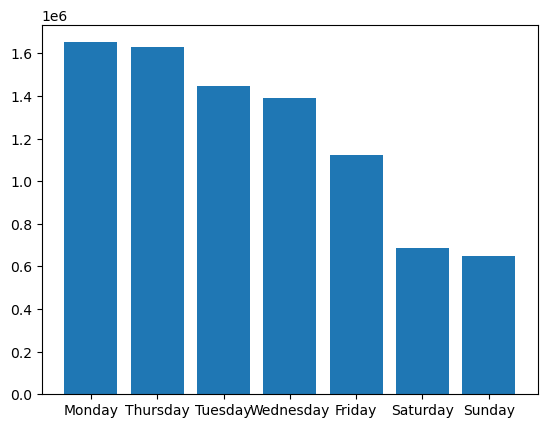

In [18]:
# 요일 별 매출액 그래프

요일 = df_4_1.index
매출액 = df_4_1['매출액']

plt.bar(요일, 매출액)

### 2. 상품별 가장 많이 팔린 요일

In [19]:
# 요일 원핫인코딩

df_5 = pd.get_dummies(df_4, columns = ['요일'])

In [20]:
df_5

,상품명,상품수량,주문수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
0,비비고 총각김치2.3KG,1,1,0,0,26900,1,1,0,0,0,0,1,0,0,0,0
1,비비고 포기배추김치 더풍부한맛 3.3kg,1,1,0,0,33800,1,1,0,0,0,0,1,0,0,0,0
2,비비고 열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,1,1,0,0,0,0,1,0,0,0,0
4,삼호 얇은포 부산어묵 1kg,4,4,0,0,35120,4,1,0,0,0,0,1,0,0,0,0
5,비비고 순살삼치구이 60gX2,1,2,0,0,10399,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,오천년의 신비 명품천일염 굵은입자 10kg,1,1,0,0,34430,1,1,0,0,0,1,0,0,0,0,0
1528,고메 오리지널 핫도그 400g,1,1,0,0,9980,1,1,0,0,0,0,0,1,0,0,0
1533,비비고 포기배추김치4.9kg,1,1,0,0,42900,1,1,0,0,0,0,0,1,0,0,0
1534,비비고 열무를 넣은 총각김치 1.3Kg,1,1,0,0,14900,1,1,0,0,0,0,0,1,0,0,0


### 3. 매출액 상위, 하위

In [21]:
# 11번가에서 가장 많이 팔린 상품은?

df_5.groupby('상품명').sum().sort_values('매출액', ascending = False).head(10)

# 주로 주부들이 많이 살만한 내역의 물품들 (4인 기준 용량)

,상품수량,주문수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
상품명,,,,,,,,,,,,,,,,
오천년의 신비 명품천일염 굵은입자 10kg,46,44,2,0,1514920,44,26,0,0,4,4,2,2,3,5,6
비비고 BASIC 포기배추김치 10kg 직택배,23,22,1,0,1177800,22,23,0,0,3,5,1,2,2,3,7
백설 빵가루 1kg,102,102,0,0,448800,102,7,0,0,0,0,1,0,3,2,1
다담 정통된장찌개 양념 140gX3,91,267,6,0,446306,85,0,91,0,7,14,3,6,41,8,12
갈색설탕15Kg,10,10,0,0,304800,10,7,0,0,2,1,1,0,1,1,1
비비고 포기배추김치4.9kg,7,7,0,0,300300,7,7,0,0,1,1,0,1,1,2,1
다담 된장찌개 양념 530gx3,12,36,0,0,215280,12,0,9,0,1,4,0,0,4,0,0
비비고테이블 특양지곰탕700G X4팩,7,28,0,0,210000,7,0,7,0,1,1,1,1,3,0,0
삼호어묵 부산어묵 바른사각 240g,155,155,0,0,187550,155,16,0,0,0,4,0,3,1,4,4


In [22]:
# 11번가에서 가장 많이 안 팔린 상품은?

df_5.groupby('상품명').sum().sort_values('매출액', ascending = False).tail(10)

# 주변 마트에서 쉽게 살 수 있는 물품들 -> 묶음 판매가 확실히 효과가 좋다

,상품수량,주문수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
상품명,,,,,,,,,,,,,,,,
행복한콩 2가지로만 국산콩두부 부침용180gX3,1,1,0,0,5700,1,1,0,0,0,0,0,0,0,1,0
다담 차돌된장찌개양념 145g,3,3,0,0,5640,3,2,0,0,0,0,0,2,0,0,0
즐거운동행 가벼운 고단백 쌈두부 사각면 100g,2,2,0,0,5220,2,1,0,0,0,1,0,0,0,0,0
다시다 골드 쇠고기 96g,1,1,0,0,5080,1,1,0,0,0,1,0,0,0,0,0
다담 깻잎지양념 150GX2개,1,2,0,0,4409,1,0,1,0,0,0,0,0,0,1,0
허브맛솔트마늘맛50g,1,1,0,0,2970,1,1,0,0,0,1,0,0,0,0,0
비비고 사골곰탕 500g,1,1,0,0,2200,1,1,0,0,0,0,0,0,1,0,0
비비고 두부김치찌개 460g,3,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0
삼호어묵 안심부산어묵 도톰쫄깃240g*2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


### 4. 요일별 판매 하위, 상위 상품

In [23]:
# 월요일과 목요일에 가장 많이 팔린 상품 top 10
monday_top10 = df_5[df_5['요일_Monday'] == 1]['상품명'].value_counts().nlargest(10)
thursday_top10 = df_5[df_5['요일_Thursday'] == 1]['상품명'].value_counts().nlargest(10)

# 금요일과 토요일에 가장 많이 팔린 상품 top 10
friday_top10 = df_5[df_5['요일_Friday'] == 1]['상품명'].value_counts().nlargest(10)
saturday_top10 = df_5[df_5['요일_Saturday'] == 1]['상품명'].value_counts().nlargest(10)

In [24]:
# 월요일 많이 팔린 상품 리스트
monday_top10 

다담 정통된장찌개 양념 140gX3            14
특설렁탕700G X2팩 +특양지곰탕700G X2팩     6
비비고 BASIC 포기배추김치 10kg 직택배       5
삼호어묵 부산어묵 바른사각 240g             4
다담 된장찌개 양념  530gx3              4
오천년의 신비 명품천일염 굵은입자  10kg        4
더건강한 닭가슴살 꼬지 청양 80g x4개         3
비비고 노릇하게 구운 갈치구이 70gX2          3
더건강한 닭가슴살 직화 통살구이100Gx3         3
비비고 노릇하게 구운 갈치구이 70g            2
Name: 상품명, dtype: int64

In [25]:
# 목요일 많이 팔린 상품 리스트
thursday_top10

다담 정통된장찌개 양념 140gX3         41
[11번가다담 차돌고추장찌개양념130g 2개     6
우렁강된장비빔양념140GX4개             6
다담 된장찌개 양념  530gx3           4
다담 마늘닭볶음탕양념 230gx2           3
백설 빵가루 1kg                   3
더건강한 닭가슴살 직화 통살구이100Gx3      3
비비고테이블 특양지곰탕700G X4팩         3
오천년의 신비 명품천일염 굵은입자  10kg     3
고메 클래식 콤비네이션 피자 405g         3
Name: 상품명, dtype: int64

In [26]:
# 금요일 많이 팔린 상품 리스트
friday_top10

다담 정통된장찌개 양념 140gX3           7
오천년의 신비 명품천일염 굵은입자  10kg      4
비비고 BASIC 포기배추김치 10kg 직택배     3
갈색설탕15Kg                      2
하선정 멸치액젓 800g                 2
고메 클래식 불고기 피자 405g            2
우렁강된장비빔양념140GX4개              2
비비고 노릇하게 구운 갈치구이 70gX2        2
하선정 까나리액젓 800g                1
해찬들 100% 우리쌀 태양초 고추장 2kg      1
Name: 상품명, dtype: int64

In [27]:
# 토요일 많이 팔린 상품 리스트
saturday_top10

비비고 순살삼치구이 60gX2            3
비비고 순살고등어구이 60gX2           3
다담 정통된장찌개 양념 140gX3         3
비비고 불고기비빔밥410GX2            2
삼호 얇은포 부산어묵 1kg             2
비비고 썰은배추김치3kg               2
오천년의 신비 명품천일염 굵은입자  10kg    2
하선정 까나리액젓 800g              2
비비고테이블 특양지곰탕700G X4팩        1
비비고 노릇하게 구운 갈치구이 70gX2      1
Name: 상품명, dtype: int64

In [28]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

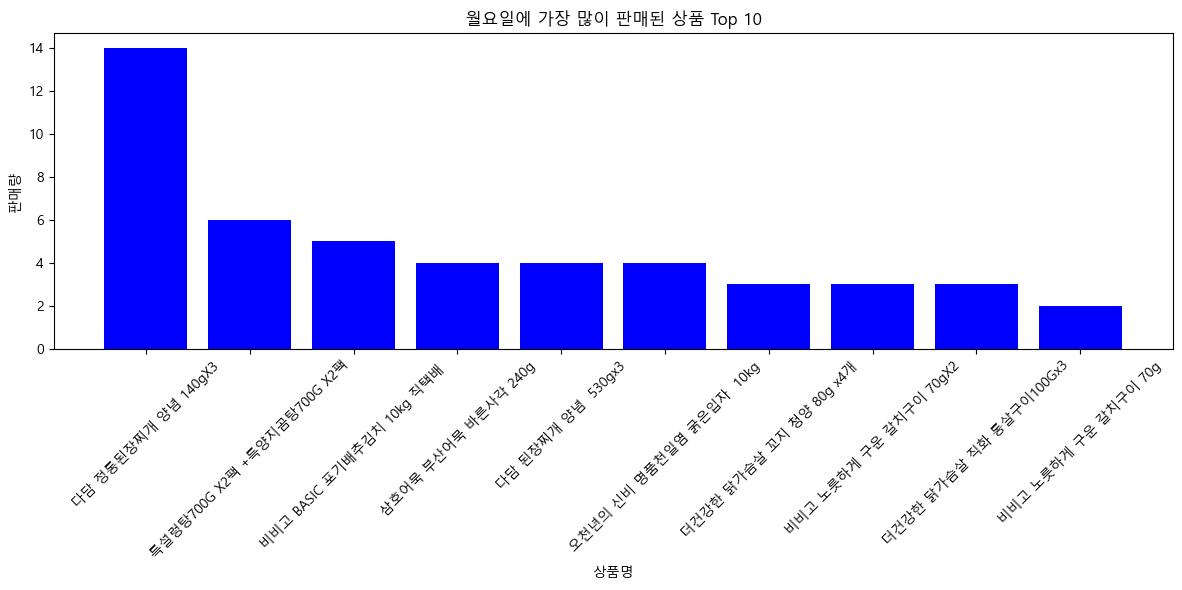

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\malgun.ttf"  # "맑은 고딕" 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)


# 월요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(monday_top10.index, monday_top10.values, color='blue')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('월요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


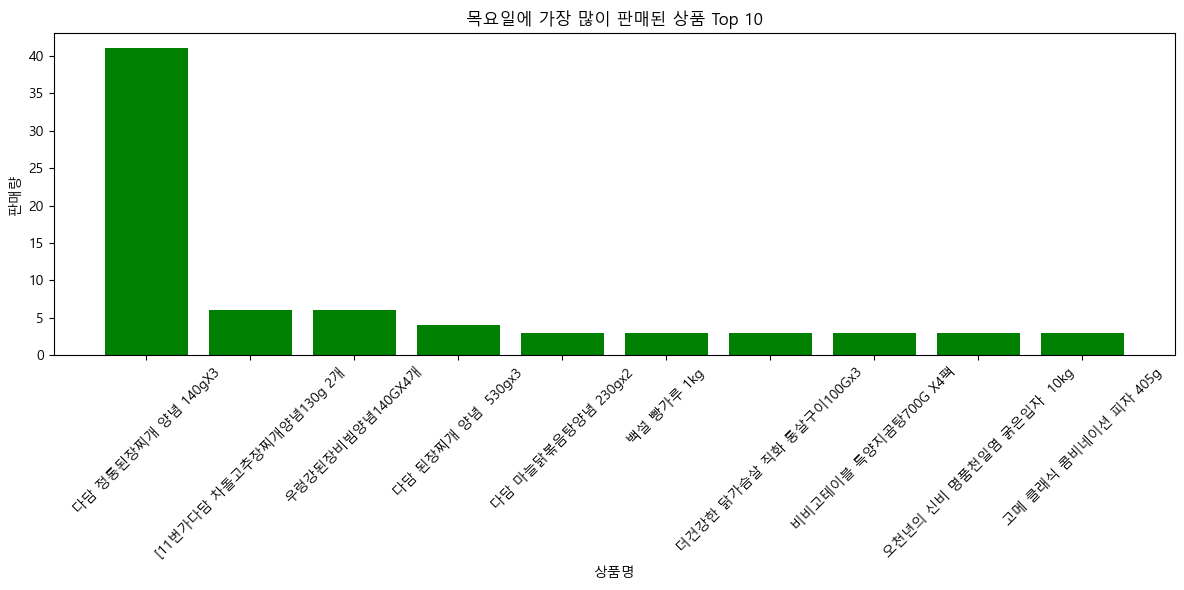

In [43]:
# 목요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(thursday_top10.index, thursday_top10.values, color='green')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('목요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

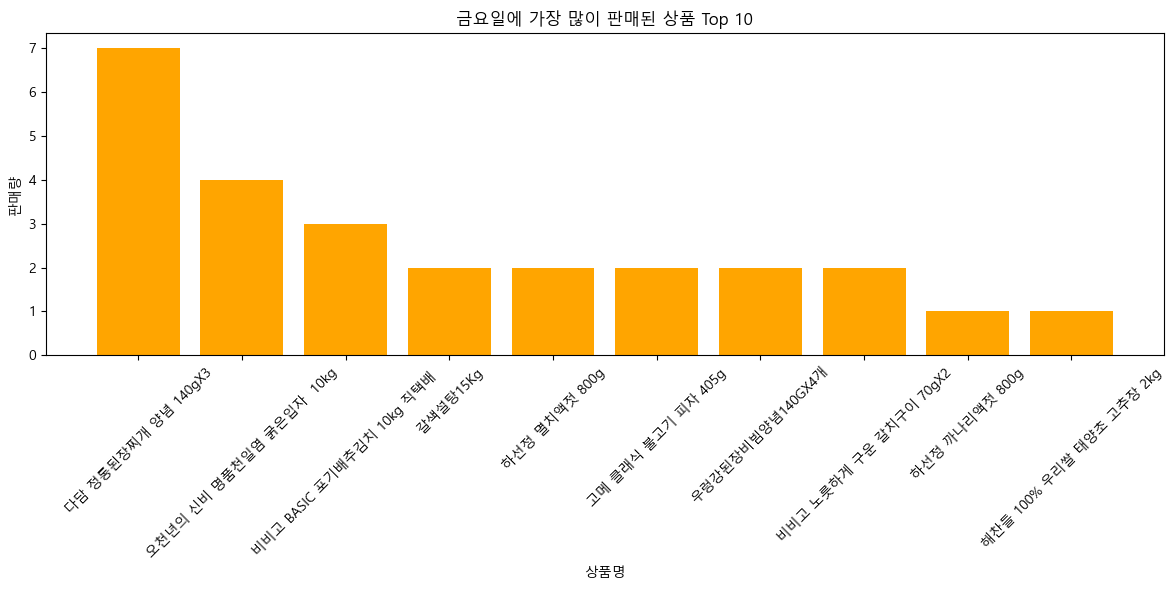

In [44]:
# 금요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(friday_top10.index, friday_top10.values, color='orange')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('금요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

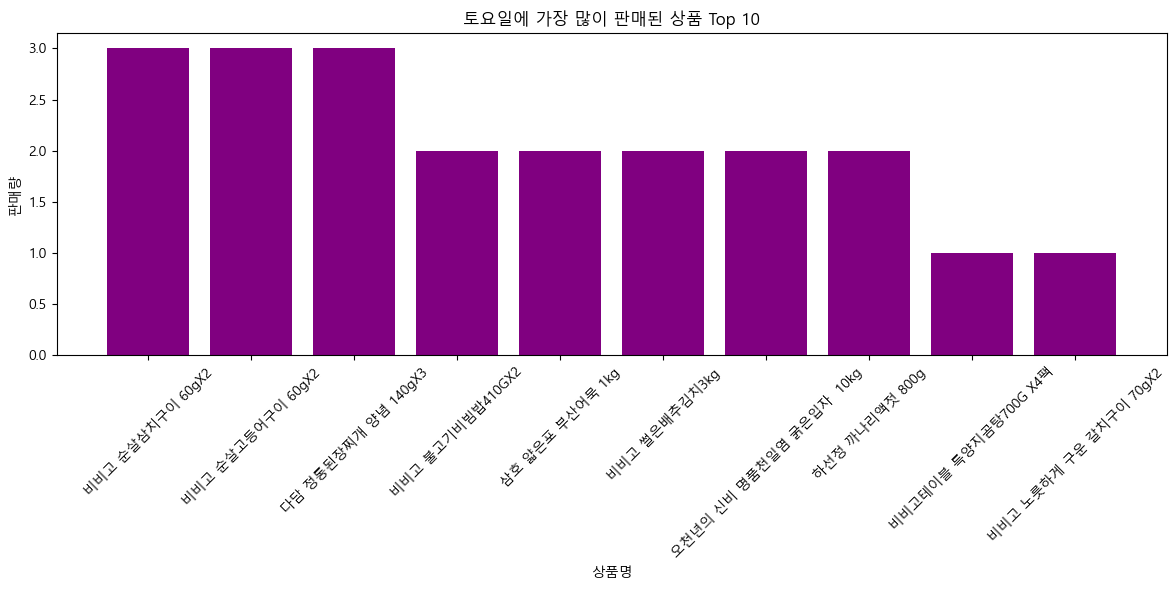

In [45]:
# 토요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(saturday_top10.index, saturday_top10.values, color='purple')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('토요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# 월요일에 가장 적게 팔린 상품 bottom 10
monday_bottom10 = df_5[df_5['요일_Monday'] == 1]['상품명'].value_counts().nsmallest(10)
# 목요일에 가장 적게 팔린 상품 bottom 10
thursday_bottom10 = df_5[df_5['요일_Thursday'] == 1]['상품명'].value_counts().nsmallest(10)
# 금요일에 가장 적게 팔린 상품 bottom 10
friday_bottom10 = df_5[df_5['요일_Friday'] == 1]['상품명'].value_counts().nsmallest(10)
# 토요일에 가장 적게 팔린 상품 bottom 10
saturday_bottom10 = df_5[df_5['요일_Saturday'] == 1]['상품명'].value_counts().nsmallest(10)

In [47]:
# 월요일 적게 팔린 상품 bottom 10
monday_bottom10

비비고 열무를 넣은 총각김치 1.3Kg    1
비비고 순살고등어구이 60gX2        1
비비고 임연수구이 60g            1
삼호 부산어묵 바른사각240g*2       1
다담 마늘닭볶음탕양념 230gx2       1
비비고 썰은배추김치1.8kg          1
갈색설탕15Kg                 1
다시다 골드 쇠고기 96g           1
허브맛솔트마늘맛50g              1
삼호 안심부산어묵 종합276g*2       1
Name: 상품명, dtype: int64

In [48]:
# 목요일 적게 팔린 상품 bottom 10
thursday_bottom10

한입쏙 비엔나 120Gx2         1
비비고 사골곰탕 500g          1
비비고 포기배추김치4.9kg        1
비비고 육개장 500g           1
비비고 차돌된장찌개 460g        1
비비고 스팸부대찌개 460g        1
비비고 차돌육개장 500g         1
갈색설탕15Kg               1
가벼운 고단백 두부면 넓은면 냉장     1
삼호어묵 부산어묵 바른사각 240g    1
Name: 상품명, dtype: int64

In [49]:
# 금요일에 가장 적게 팔린 상품 bottom 10
friday_bottom10

하선정 까나리액젓 800g              1
해찬들 100% 우리쌀 태양초 고추장 2kg    1
비비고 청양고기만두 400gx2           1
삼호 부산어묵 바른사각240g*2          1
다담 된장찌개 양념  530gx3          1
비비고 노릇하게 구운 갈치구이 70g        1
비비고테이블 특설렁탕700G X4팩         1
비비고 포기배추김치4.9kg             1
[11번가다담 차돌고추장찌개양념130g 2개    1
고메 클래식 콤비네이션 피자 405g        1
Name: 상품명, dtype: int64

In [50]:
# 토요일에 가장 적게 팔린 상품 bottom 10
saturday_bottom10

비비고테이블 특양지곰탕700G X4팩        1
비비고 노릇하게 구운 갈치구이 70gX2      1
백설 빵가루 1kg                  1
하선정 멸치액젓 800g               1
백설 건강발효 사과식초 800ml          1
비비고 총각김치2.3KG               1
비비고테이블 특설렁탕700G X4팩         1
비비고 매콤부추고기볶음밥 400GX2        1
비비고 포기배추김치 더풍부한맛 3.3kg      1
[11번가다담 차돌고추장찌개양념130g 2개    1
Name: 상품명, dtype: int64

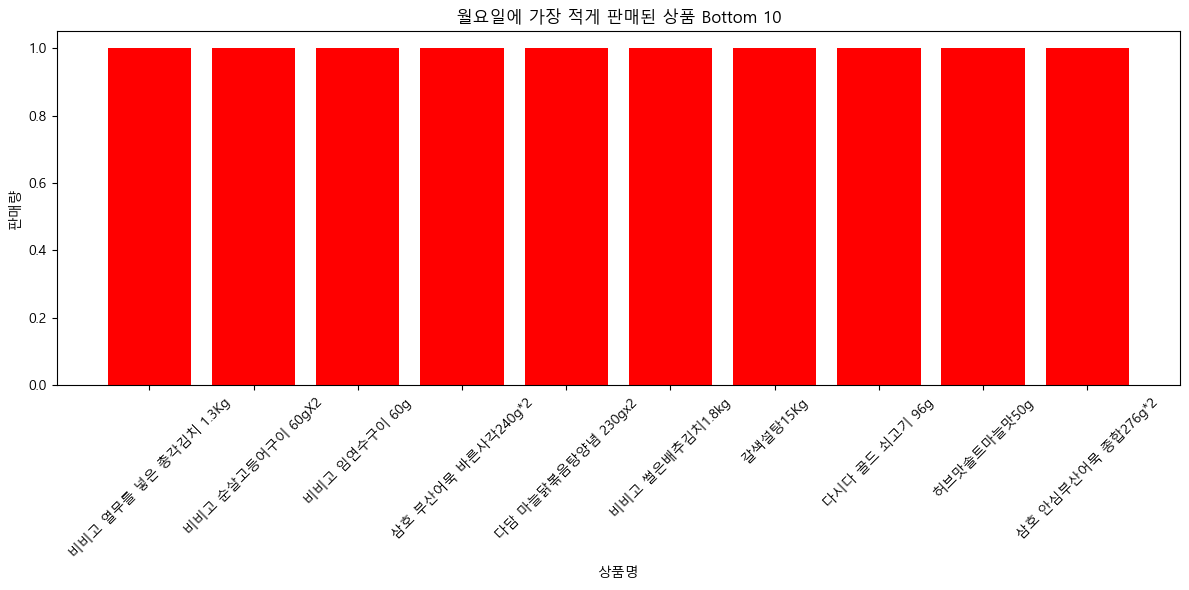

In [51]:
# 월요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(monday_bottom10.index, monday_bottom10.values, color='red')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('월요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

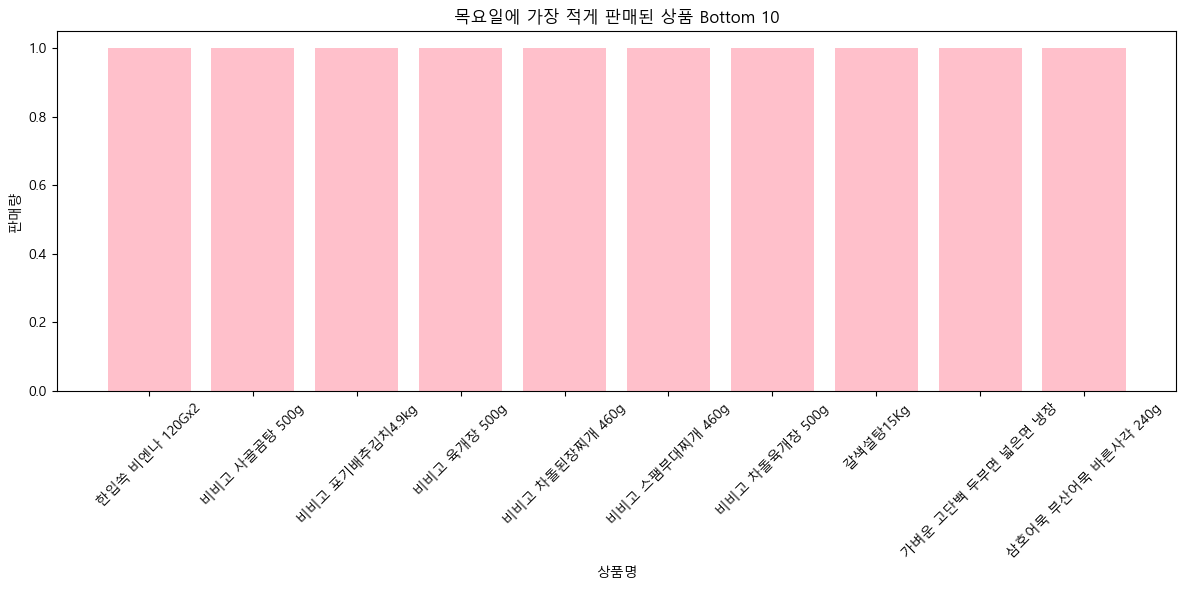

In [52]:
# 목요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(thursday_bottom10.index, thursday_bottom10.values, color='pink')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('목요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

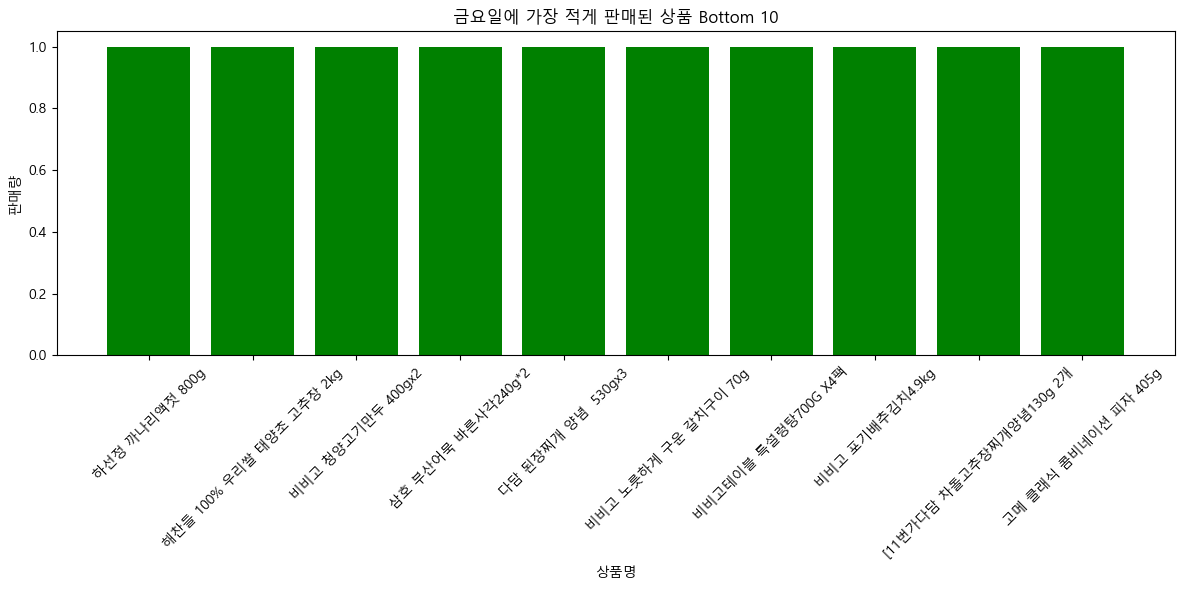

In [53]:
# 금요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(friday_bottom10.index, friday_bottom10.values, color='green')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('금요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

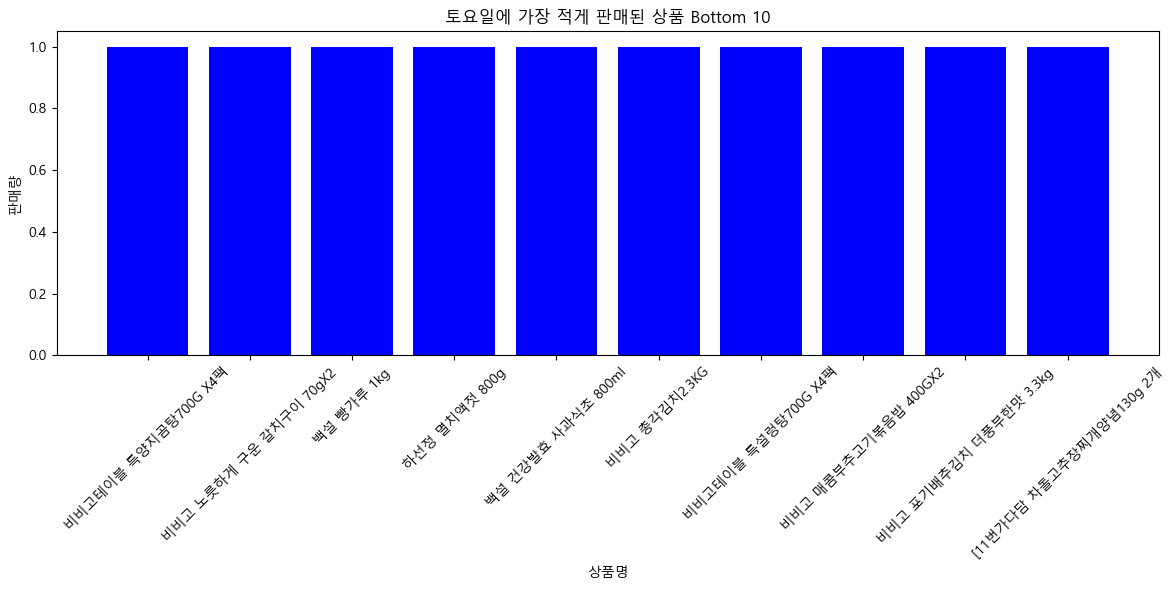

In [54]:
# 토요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(saturday_bottom10.index, saturday_bottom10.values, color='Blue')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('토요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()